# Unsupervised learning with sklearn

In [35]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score, adjusted_rand_score, confusion_matrix, adjusted_rand_score, homogeneity_score, completeness_score, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from skimpy import skim

### Load Dataset "digits

In [3]:
digits = load_digits()
X = digits.data # Pictures
y = digits.target # Titles (0 - 9)

### Analyse data

In [4]:
# Check data shape
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [5]:
# Check data type 
print(X.dtype)
print(y.dtype)

float64
int64


In [6]:
df = pd.DataFrame(X)
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1797   │ │ float64     │ 64    │                                                          │
│ │ Number of columns │ 64     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column     ┃ NA   ┃ NA %    ┃ mean          ┃ sd         ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │          0 │    0 │       0 │             0 │          0 │    0 │     0 │     0 │     0 │      0 │     █   │  │
│ │          1 │    0 │       0 │        0.3038 │     0.9072 │    0 │     0 │     0 │     0 │      8 │    █    │  │
│ │          2 │    0 │       0 │         5.205 │      4.755 │    0 │     1 │     4 │     9 │     16 │ █▄▂▃▂▁  │  │
│ │          3 │    0 │       0 │         11.84 │      4.249 │    0 │    10 │    13 │    15 │     16 │ ▁▁▁▂▅█  │  │
│ │          4 │    0 │       0 │         11.85 │      4.287 │    0 │    10 │    13 │    15 │     16 │ ▁▁▁▂▄█  │  │
│ │          5 │    0 │       0 │         5.782 │      5.666 │    0 │     0 │     4 │    11 │     16 │ █▃▁▂▂▃  │  │
│ │          6 │    0 │       0 │         1.362 │      3.326 │    0 │     0 │     0 │     0 │     16 │   █▁    │  │
│ │          7 │    0 │       0 │        0.1297 │      1.037 │    0 │     0 │     0 │     0 │     15 │    █    │  │
│ │          8 │    0 │       0 │      0.005565 │    0.09422 │    0 │     0 │     0 │     0 │      2 │    █    │  │
│ │          9 │    0 │       0 │         1.994 │      3.196 │    0 │     0 │     0 │     3 │     16 │  █▂▁▁   │  │
│ │         10 │    0 │       0 │         10.38 │      5.421 │    0 │     6 │    12 │    15 │     16 │ ▃▂▁▂▄█  │  │
│ │         11 │    0 │       0 │         11.98 │      3.978 │    0 │     9 │    13 │    16 │     16 │  ▁▁▃▄█  │  │
│ │         12 │    0 │       0 │         10.28 │      4.783 │    0 │     7 │    11 │    15 │     16 │ ▂▃▂▅▅█  │  │
│ │         13 │    0 │       0 │         8.176 │      6.053 │    0 │     2 │     9 │    14 │     16 │ █▃▂▃▅█  │  │
│ │         14 │    0 │       0 │         1.846 │      3.586 │    0 │     0 │     0 │     2 │     16 │  █▁ ▁   │  │
│ │         15 │    0 │       0 │         0.108 │     0.8279 │    0 │     0 │     0 │     0 │     12 │    █    │  │
│ │         16 │    0 │       0 │      0.002782 │    0.06237 │    0 │     0 │     0 │     0 │      2 │    █    │  │
│ │         17 │    0 │       0 │         2.602 │      3.576 │    0 │     0 │     1 │     4 │     16 │  █▂▁▁   │  │
│ │         18 │    0 │       0 │         9.903 │      5.691 │    0 │     5 │    12 │    15 │     16 │ ▄▂▁▂▄█  │  │
│ │         19 │    0 │       0 │         6.993 │      5.803 │    0 │     1 │     6 │    12 │     16 │ █▃▂▃▂▅  │  │
│ │         20 │    0 │       0 │         7.098 │      6.176 │    0 │     1 │     6 │    13 │     16 │ █▂▁▂▂▅  │  │
│ │         21 │    0 │       0 │         7.806 │      6.197 │    0 │     0 │     8 │    14 │     16 │ █▂▁▃▄▇  │  │
│ │         22 │    0 │       0 │         1.789 │       

# Display pictures from dataset

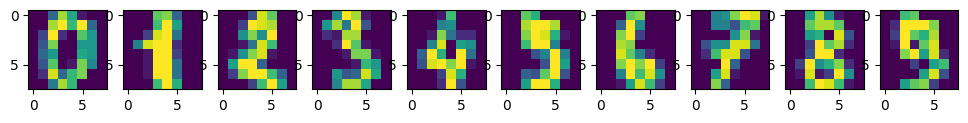

In [7]:
images = digits.images

plt.figure(figsize=(12, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(images[i])

# Check if dataset is balanced

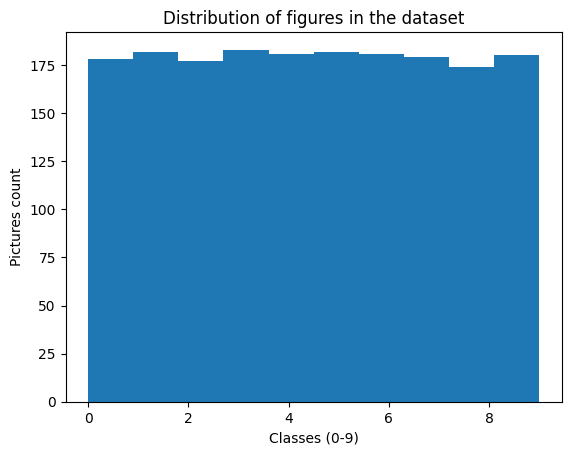

In [8]:
plt.hist(y,bins=10) # Graph to verify if all types (0 - 9) have the same count of pictures
plt.title("Distribution of figures in the dataset")
plt.xlabel("Classes (0-9)")
plt.ylabel("Pictures count")
plt.show()

# Check for outliers (pictures whith a number not valid)

In [9]:
# Fit with Isolation Forest
model = IsolationForest(random_state=0, contamination=0.02) # remove 2% of data not in range (best practice max 5%)
model.fit(X)

# This model create an array of 1 and -1 where -1 = outlier, 1 = inlier
# Get outliers
outliers_mask = model.predict(X) == -1 

# Count the number of outliers
num_outliers = np.sum(outliers_mask)
print(f"Outliers detected: {num_outliers}")

# Remove outliers from X and y
X_clean = X[~outliers_mask]
y_clean = y[~outliers_mask]

print(f"New dataset size: {X_clean.shape[0]}")

Outliers detected: 36
New dataset size: 1761


# Display an outliers

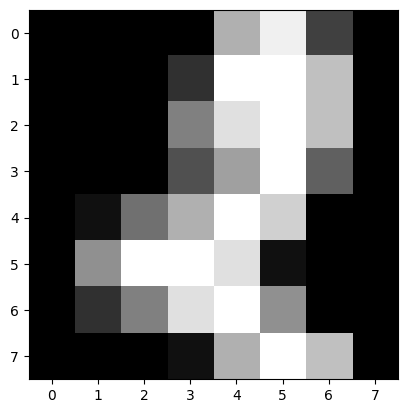

In [10]:
outlier_images = digits.images[outliers_mask]
plt.imshow(outlier_images[0], cmap='gray')

In [11]:
outlier_labels = y[outliers_mask]
print(f"outliers was a : {outlier_labels[0]}")

outliers was a : 2


# Elbow method

In [12]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Model cost (Inertia)')

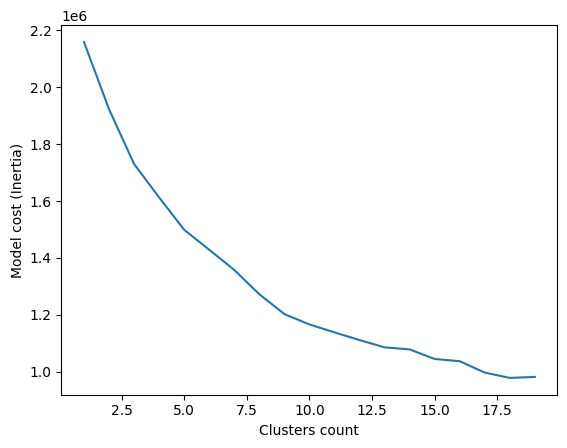

In [13]:
plt.plot(K_range, inertia)
plt.xlabel('Clusters count')
plt.ylabel('Model cost (Inertia)')

Dataset has value between 0 - 9 so we expect the kink to be around K=10, reflecting the 10 natural classes in the data.

# PCA: Size reduction

Our dataset has 64 dimensions (8*8 pixels)
It's not practical to view our clusters
We gonna reduce to 2 dimensions

### 64D visualisation

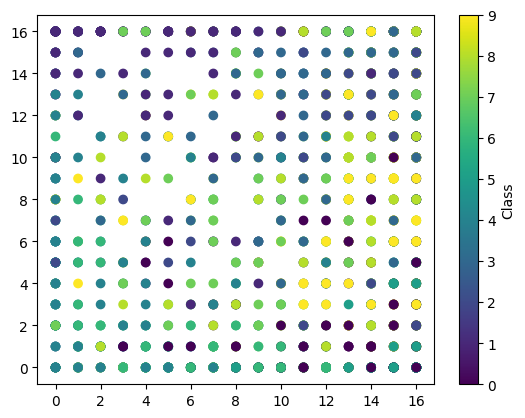

In [14]:
scatter = plt.scatter(X[:,10], X[:,20], c=y)
plt.colorbar(scatter, label='Class')

### 2D visualisation

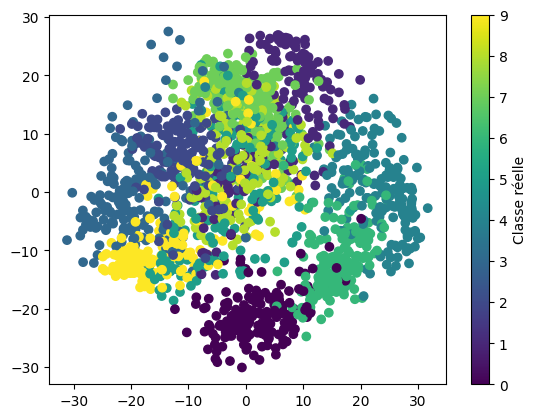

In [15]:
model = PCA(n_components=2) # 2 = 2 dimensions
model.fit(X)

x_pca = model.transform(X)
scatter = plt.scatter(x_pca[:,0], x_pca[:,1], c=y)
plt.colorbar(scatter, label='Classe réelle')


### KMEANS Model (evaluate cluster quality)

In [16]:
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X)

print("-"*50)

# For all score, best if 1
print("Adjusted Rand Score   : ", adjusted_rand_score(y, clusters)) # cluster similarity 
print("Homogeneity Score     : ", homogeneity_score(y, clusters)) # cluster homogeneity (contain only one class)
print("Completeness Score    : ", completeness_score(y, clusters)) # All items of on class are in the same cluster
print("Silhouette Score (X)  : ", silhouette_score(X, clusters)) # All items of on class are in the same cluster

print("-"*50)

--------------------------------------------------
Adjusted Rand Score   :  0.725814218974996
Homogeneity Score     :  0.7734341694562783
Completeness Score    :  0.7765663324401426
Silhouette Score (X)  :  0.1764738746996612
--------------------------------------------------


Silhouette Score less than 0.5. Clusturing not pertinent for dataset digits but data structure ok cause of ARI

### DBSCAN Model 2D (evaluate cluster quality)

In [17]:
dbscan = DBSCAN(eps=10, min_samples=5)
clusters = dbscan.fit_predict(x_pca)

mask = clusters != -1
X_filtered = x_pca[mask]
y_filtered = y[mask]
clusters_filtered = clusters[mask]

In [18]:
print("-"*50)

# For all score, best if 1
print("Adjusted Rand Score   : ", adjusted_rand_score(y_filtered, clusters_filtered)) # cluster similarity 
print("Homogeneity Score     : ", homogeneity_score(y_filtered, clusters_filtered)) # cluster homogeneity (contain only one class)
print("Completeness Score    : ", completeness_score(y_filtered, clusters_filtered)) # All items of on class are in the same cluster

if len(set(clusters_filtered)) > 1:
    print("Silhouette Score (PCA):", silhouette_score(X_filtered, clusters_filtered))
else:
    print("Silhouette Score      : Non calculable (1 cluster détecté)")

print("-"*50)

--------------------------------------------------
Adjusted Rand Score   :  0.0
Homogeneity Score     :  0.0
Completeness Score    :  1.0
Silhouette Score      : Non calculable (1 cluster détecté)
--------------------------------------------------


### DBSCAN Model 10D (evaluate cluster quality)

In [19]:
X_reduced = PCA(n_components=10).fit_transform(X)

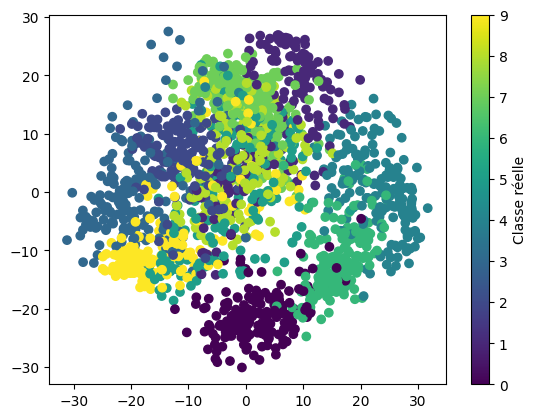

In [20]:
scatter = plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.colorbar(scatter, label='Classe réelle')

In [21]:
dbscan = DBSCAN(eps=10, min_samples=5)
clusters = dbscan.fit_predict(X_reduced)

mask = clusters != -1
X_filtered = x_pca[mask]
y_filtered = y[mask]
clusters_filtered = clusters[mask]

In [22]:
print("-"*50)

# For all score, best if 1
print("Adjusted Rand Score   : ", adjusted_rand_score(y_filtered, clusters_filtered)) # cluster similarity 
print("Homogeneity Score     : ", homogeneity_score(y_filtered, clusters_filtered)) # cluster homogeneity (contain only one class)
print("Completeness Score    : ", completeness_score(y_filtered, clusters_filtered)) # All items of on class are in the same cluster

if len(set(clusters_filtered)) > 1:
    print("Silhouette Score (PCA):", silhouette_score(X_filtered, clusters_filtered))
else:
    print("Silhouette Score      : Non calculable (1 cluster détecté)")

print("-"*50)

--------------------------------------------------
Adjusted Rand Score   :  0.8445099376360461
Homogeneity Score     :  0.9987074188856193
Completeness Score    :  0.7799232839919699
Silhouette Score (PCA): 0.09278837459252016
--------------------------------------------------


### Create a Logistic regression model

In [23]:
# Normalise data between 0 and 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Split data 80% train 20% tests
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [26]:
print("-"*30)

print("MAE      : ", mean_absolute_error(y_test, y_pred)) 
print("MSE      : ", mean_squared_error(y_test, y_pred))
print("R²       : ", r2_score(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred))

print("-"*30)

------------------------------
MAE      :  0.1388888888888889
MSE      :  0.8666666666666667
R²       :  0.8943801037392001
Accuracy :  0.9722222222222222
------------------------------


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.89      0.89      0.89        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



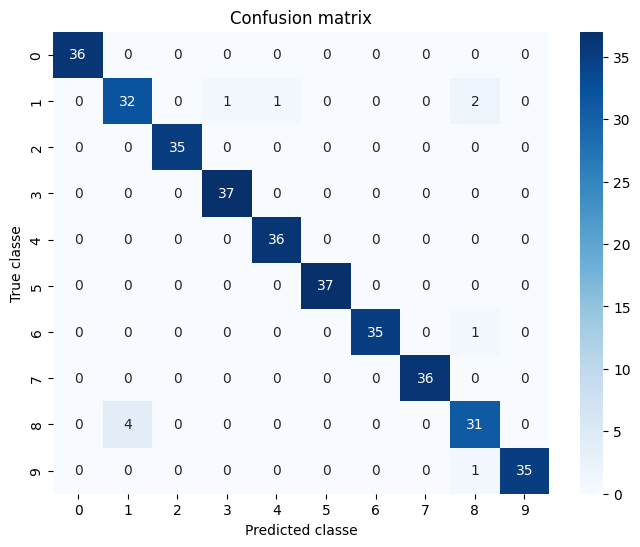

In [28]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("Predicted classe")
plt.ylabel("True classe")
plt.show()

### Create a CNN Model with keras

In [ ]:
# Doesn't work
# X = X_scaled

# Restore X from previous update
X, y = digits.images, digits.target

# Get the max pixel value to normalise data
max_pixel_value = X.max() 
X = X / max_pixel_value  # Normalise pixel between 0 and 1

# y contain classes as number (0 à 9). to_categorical transform classes to binary vector with length of 10
y_cat = to_categorical(y, num_classes=10)

# Split data and stratify=y to set same proportion in each fold
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y
)

# Create CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(), # 2D - 1D (vector)
    Dense(64, activation='relu'),
    Dropout(0.3), # disabled 30% of neurons to avoid overfitting
    Dense(10, activation='softmax') # 10 neurons to predict value between 0 and 9
])

# Compile model "categorical_crossentropy" -> cause of to_categorical
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1)

# Evaluate 
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/15


/home/thomas/atlas/projects/MNIST/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1751029444.101103  290382 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1751029444.101638  290382 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2235 - loss: 2.2200 - val_accuracy: 0.7292 - val_loss: 1.9573
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5643 - loss: 1.8403 - val_accuracy: 0.7917 - val_loss: 1.3347
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7028 - loss: 1.2638 - val_accuracy: 0.8958 - val_loss: 0.7959
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7896 - loss: 0.8336 - val_accuracy: 0.9167 - val_loss: 0.5317
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8439 - loss: 0.5879 - val_accuracy: 0.9375 - val_loss: 0.3723
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8663 - loss: 0.5013 - val_accuracy: 0.9514 - val_loss: 0.2960
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9011 - loss: 0.4112 - val_accuracy: 0.9514 - val_loss: 0.2611
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8985 - loss: 0.3668 - val_accuracy: 0.9583 - val_loss: 0.2163
Epo

In [30]:
print("-"*30)

print("Accuracy  : ", accuracy)
print("Loss      : ", loss)

print("-"*30)

------------------------------
Accuracy  :  0.9666666388511658
Loss      :  0.11051933467388153
------------------------------


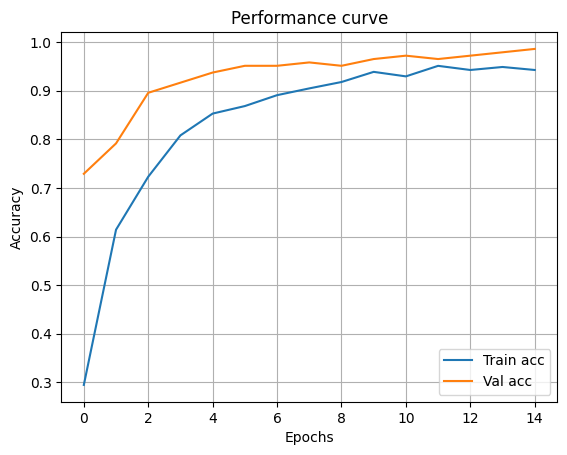

In [31]:
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Performance curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Predict from test value
y_pred_prob = model.predict(X_test)

# Convert vector binary to classes (0 à 9)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [33]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.94      0.92      0.93        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.92      0.97      0.95        36
           5       0.97      1.00      0.99        37
           6       0.97      1.00      0.99        36
           7       0.95      1.00      0.97        36
           8       0.97      0.89      0.93        35
           9       0.94      0.92      0.93        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



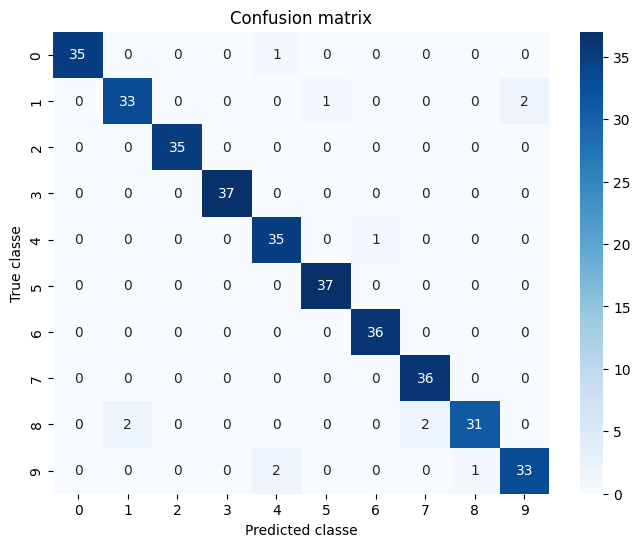

In [34]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("Predicted classe")
plt.ylabel("True classe")
plt.show()

### CNN from 28*28

In [48]:
# Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape((X_train.shape[0], -1))  # (60000, 784)
y = y_train

### Display outliers

In [ ]:
model = IsolationForest(random_state=0, contamination=0.02)  # 2% outliers
model.fit(X)

# This model create an array of 1 and -1 where -1 = outlier, 1 = inlier
# Get outliers
outliers_mask = model.predict(X) == -1 

# Count the number of outliers
num_outliers = np.sum(outliers_mask)
print(f"Outliers detected: {num_outliers}")

# Remove outliers from X and y
X_clean = X[~outliers_mask]
y_clean = y[~outliers_mask]

print(f"New dataset size: {X_clean.shape[0]}")

Outliers detected: 1200
New dataset size: 58800


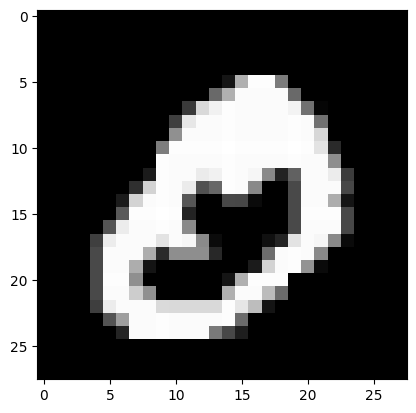

In [53]:
X_images = X_train
outlier_images = X_images[outliers_mask]
plt.imshow(outlier_images[0], cmap='gray')

### Display 28*28 PCA

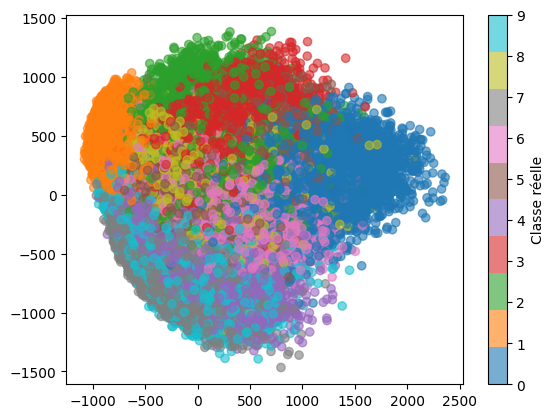

In [49]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Classe réelle')

In [ ]:
# Normalise pixel between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# Add a new dimension (grayscale = 1 channel)
X_train = np.expand_dims(X_train, axis=-1)  # (60000, 28, 28, 1)
X_test  = np.expand_dims(X_test, axis=-1)

# Encode labels (0-9) to binary vector (one hot) one-hot
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

# Create CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/home/thomas/atlas/projects/MNIST/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8384 - loss: 0.5388 - val_accuracy: 0.9765 - val_loss: 0.0817
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9643 - loss: 0.1185 - val_accuracy: 0.9827 - val_loss: 0.0621
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9735 - loss: 0.0865 - val_accuracy: 0.9850 - val_loss: 0.0554
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9780 - loss: 0.0689 - val_accuracy: 0.9877 - val_loss: 0.0511
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9817 - loss: 0.0587 - val_accuracy: 0.9865 - val_loss: 0.0501


In [37]:
print("-"*30)

print("Accuracy  : ", accuracy)
print("Loss      : ", loss)

print("-"*30)

------------------------------
Accuracy  :  0.9666666388511658
Loss      :  0.11051933467388153
------------------------------


In [38]:
# Predict from test value
y_pred_prob = model.predict(X_test)

# Convert vector binary to classes (0 à 9)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [39]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



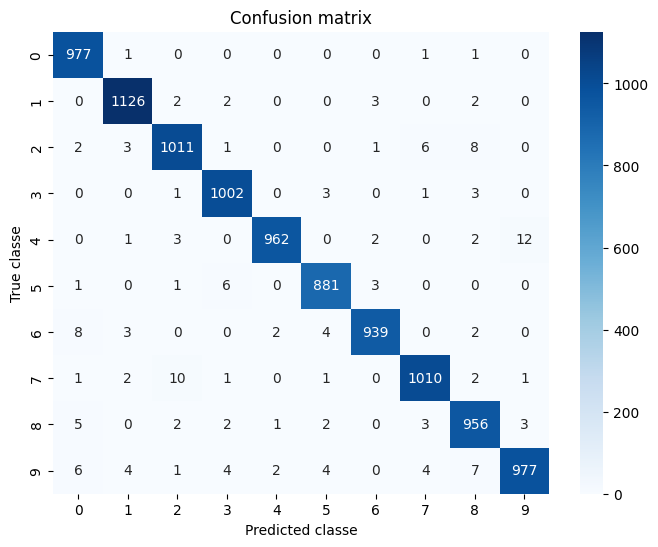

In [40]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("Predicted classe")
plt.ylabel("True classe")
plt.show()